In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

from smallstations import io

In [4]:
io.inventory()

# Step 1: get general infos from wikipedia

In [5]:
stations_url = 'https://fr.wikipedia.org/wiki/Liste_des_stations_du_m%C3%A9tro_de_Paris'
res = requests.get(stations_url)
soup = BeautifulSoup(res.content,'html5lib')
table = soup.find_all('table')[0]

In [6]:
stations = []
for i, row in enumerate(table.findAll('tr')):
    station = {}
    columns = row.findAll('td')
    try:
        station = columns[0].text.strip().replace('\u200d', '')
        lines_infos = columns[1].findAll('a')
        frequentation = int(columns[6].text.strip().replace('\xa0', '').replace('+0', '').replace(',', ''))
    except IndexError:
        continue
        
    for infos in lines_infos:
        line_name = infos.attrs['title'].replace('\xa0', ' ').replace(' du métro de Paris', '')
        line_url = 'https://fr.wikipedia.org' + infos.attrs['href']

        stations.append({
            'station': station,
            'frequentation': frequentation,
            'line': line_name,
            'line_url': line_url,
        })
        
stations = pd.DataFrame.from_records(stations)
stations.head()

,frequentation,line,line_url,station
0,2417881,Ligne 12,https://fr.wikipedia.org/wiki/Ligne_12_du_m%C3...,Abbesses
1,5124204,Ligne 4,https://fr.wikipedia.org/wiki/Ligne_4_du_m%C3%...,Alésia
2,3666961,Ligne 2,https://fr.wikipedia.org/wiki/Ligne_2_du_m%C3%...,Alexandre Dumas
3,4204705,Ligne 9,https://fr.wikipedia.org/wiki/Ligne_9_du_m%C3%...,Alma - Marceau
4,3780611,Ligne 3,https://fr.wikipedia.org/wiki/Ligne_3_du_m%C3%...,Anatole France


In [7]:
lines = stations.drop_duplicates(subset=['line']).copy()
lines['n'] = lines['line'].apply(lambda s: len(s))
lines.sort_values(by=['n', 'line']).reset_index(drop=True).drop('n', axis=1).reset_index()

,index,frequentation,line,line_url,station
0,0,2972019,Ligne 1,https://fr.wikipedia.org/wiki/Ligne_1_du_m%C3%...,Argentine
1,1,3666961,Ligne 2,https://fr.wikipedia.org/wiki/Ligne_2_du_m%C3%...,Alexandre Dumas
2,2,3780611,Ligne 3,https://fr.wikipedia.org/wiki/Ligne_3_du_m%C3%...,Anatole France
3,3,5124204,Ligne 4,https://fr.wikipedia.org/wiki/Ligne_4_du_m%C3%...,Alésia
4,4,13438906,Ligne 5,https://fr.wikipedia.org/wiki/Ligne_5_du_m%C3%...,Bastille
5,5,2176466,Ligne 6,https://fr.wikipedia.org/wiki/Ligne_6_du_m%C3%...,Bel-Air
6,6,7131674,Ligne 7,https://fr.wikipedia.org/wiki/Ligne_7_du_m%C3%...,Aubervilliers - Pantin - Quatre Chemins
7,7,4454198,Ligne 8,https://fr.wikipedia.org/wiki/Ligne_8_du_m%C3%...,Balard
8,8,4204705,Ligne 9,https://fr.wikipedia.org/wiki/Ligne_9_du_m%C3%...,Alma - Marceau
9,9,1470809,Ligne 10,https://fr.wikipedia.org/wiki/Ligne_10_du_m%C3...,Avenue Émile-Zola


# Step 2: get line colors from wikipedia

In [11]:
df = io.load_dataframe('stations_and_lines.csv')
df.iloc[0]['line_url']

'https://fr.wikipedia.org/wiki/Ligne_12_du_m%C3%A9tro_de_Paris'

In [37]:
import re

def get_color_from_url(line_url):
    result = requests.get(line_url)
    soup = BeautifulSoup(result.content,'html5lib')
    div_with_color = soup.find_all('td', 'entete defaut')[0]
    div_style = div_with_color.attrs['style']
    color = re.search(r'background-color:(#[\w\d]{6})', div_style).group(1)
    return color

get_color_from_url('https://fr.wikipedia.org/wiki/Ligne_12_du_m%C3%A9tro_de_Paris')

'#007852'

In [68]:
lines = stations.drop_duplicates(subset=['line']).copy()
lines['color'] = lines['line_url'].apply(get_color_from_url)
lines

,frequentation,line,line_url,station,color
0,2417881,Ligne 12,https://fr.wikipedia.org/wiki/Ligne_12_du_m%C3...,Abbesses,#007852
1,5124204,Ligne 4,https://fr.wikipedia.org/wiki/Ligne_4_du_m%C3%...,Alésia,#be418d
2,3666961,Ligne 2,https://fr.wikipedia.org/wiki/Ligne_2_du_m%C3%...,Alexandre Dumas,#003ca6
3,4204705,Ligne 9,https://fr.wikipedia.org/wiki/Ligne_9_du_m%C3%...,Alma - Marceau,#b6bd00
4,3780611,Ligne 3,https://fr.wikipedia.org/wiki/Ligne_3_du_m%C3%...,Anatole France,#837902
6,2972019,Ligne 1,https://fr.wikipedia.org/wiki/Ligne_1_du_m%C3%...,Argentine,#ffcd00
8,3908721,Ligne 11,https://fr.wikipedia.org/wiki/Ligne_11_du_m%C3...,Arts et Métiers,#704b1c
10,7131674,Ligne 7,https://fr.wikipedia.org/wiki/Ligne_7_du_m%C3%...,Aubervilliers - Pantin - Quatre Chemins,#fa9aba
11,1470809,Ligne 10,https://fr.wikipedia.org/wiki/Ligne_10_du_m%C3...,Avenue Émile-Zola,#c9910d
13,4454198,Ligne 8,https://fr.wikipedia.org/wiki/Ligne_8_du_m%C3%...,Balard,#e19bdf


In [69]:
lines['line_number'] = lines['line'].apply(lambda s: int(re.findall('\d+', s)[0]))
lines['line_text_length'] = lines['line'].apply(len)
lines.sort_values(by=['line_number', 'line_text_length'], inplace=True)
lines['line_index'] = range(len(lines))
lines

,frequentation,line,line_url,station,color,line_number,line_text_length,line_index
6,2972019,Ligne 1,https://fr.wikipedia.org/wiki/Ligne_1_du_m%C3%...,Argentine,#ffcd00,1,7,0
2,3666961,Ligne 2,https://fr.wikipedia.org/wiki/Ligne_2_du_m%C3%...,Alexandre Dumas,#003ca6,2,7,1
4,3780611,Ligne 3,https://fr.wikipedia.org/wiki/Ligne_3_du_m%C3%...,Anatole France,#837902,3,7,2
123,7142788,Ligne 3bis,https://fr.wikipedia.org/wiki/Ligne_3_bis_du_m...,Gambetta,#6ec4e8,3,10,3
1,5124204,Ligne 4,https://fr.wikipedia.org/wiki/Ligne_4_du_m%C3%...,Alésia,#be418d,4,7,4
18,13438906,Ligne 5,https://fr.wikipedia.org/wiki/Ligne_5_du_m%C3%...,Bastille,#ff7e2e,5,7,5
20,2176466,Ligne 6,https://fr.wikipedia.org/wiki/Ligne_6_du_m%C3%...,Bel-Air,#6eca97,6,7,6
10,7131674,Ligne 7,https://fr.wikipedia.org/wiki/Ligne_7_du_m%C3%...,Aubervilliers - Pantin - Quatre Chemins,#fa9aba,7,7,7
33,569990,Ligne 7bis,https://fr.wikipedia.org/wiki/Ligne_7_bis_du_m...,Bolivar,#6eca97,7,10,8
13,4454198,Ligne 8,https://fr.wikipedia.org/wiki/Ligne_8_du_m%C3%...,Balard,#e19bdf,8,7,9


In [36]:
re.search(r'background-color:(#[\w\d]{6})', table.attrs['style']).group(1)

'#007852'

In [58]:
int(re.findall('\d+', 'Ligne 32bis')[0])

32

# Step 3: create figure

In [137]:
stations = io.load_dataframe('stations_and_lines_with_color.csv')
stations.head()

,frequentation,line,line_url,station,line_color,line_index
0,2417881,Ligne 12,https://fr.wikipedia.org/wiki/Ligne_12_du_m%C3...,Abbesses,#007852,17
1,5124204,Ligne 4,https://fr.wikipedia.org/wiki/Ligne_4_du_m%C3%...,Alésia,#be418d,8
2,3666961,Ligne 2,https://fr.wikipedia.org/wiki/Ligne_2_du_m%C3%...,Alexandre Dumas,#003ca6,5
3,4204705,Ligne 9,https://fr.wikipedia.org/wiki/Ligne_9_du_m%C3%...,Alma - Marceau,#b6bd00,14
4,3780611,Ligne 3,https://fr.wikipedia.org/wiki/Ligne_3_du_m%C3%...,Anatole France,#837902,6


In [138]:
from matplotlib.patches import Circle, Wedge
from matplotlib.collections import PatchCollection
from matplotlib import pyplot as plt


In [139]:
stations['station'].value_counts().head()

Châtelet                    5
République                  5
Montparnasse - Bienvenüe    4
Saint-Lazare                4
Nation                      4
Name: station, dtype: int64

In [140]:
sample = stations.loc[stations['station'] == 'Saint-Lazare']
sample

,frequentation,line,line_url,station,line_color,line_index
336,45309544,Ligne 3,https://fr.wikipedia.org/wiki/Ligne_3_du_m%C3%...,Saint-Lazare,#837902,6
337,45309544,Ligne 12,https://fr.wikipedia.org/wiki/Ligne_12_du_m%C3...,Saint-Lazare,#007852,17
338,45309544,Ligne 13,https://fr.wikipedia.org/wiki/Ligne_13_du_m%C3...,Saint-Lazare,#6ec4e8,18
339,45309544,Ligne 14,https://fr.wikipedia.org/wiki/Ligne_14_du_m%C3...,Saint-Lazare,#62259d,19


In [141]:
top_stations = stations.loc[
    stations['station'].isin(stations['station'].value_counts().head(10).index)
]

In [142]:
patches = [
    Wedge((0, 0), row['line_index'], 0, 360, width=1, color=row['line_color'])
    for _, row in sample.iterrows()
]

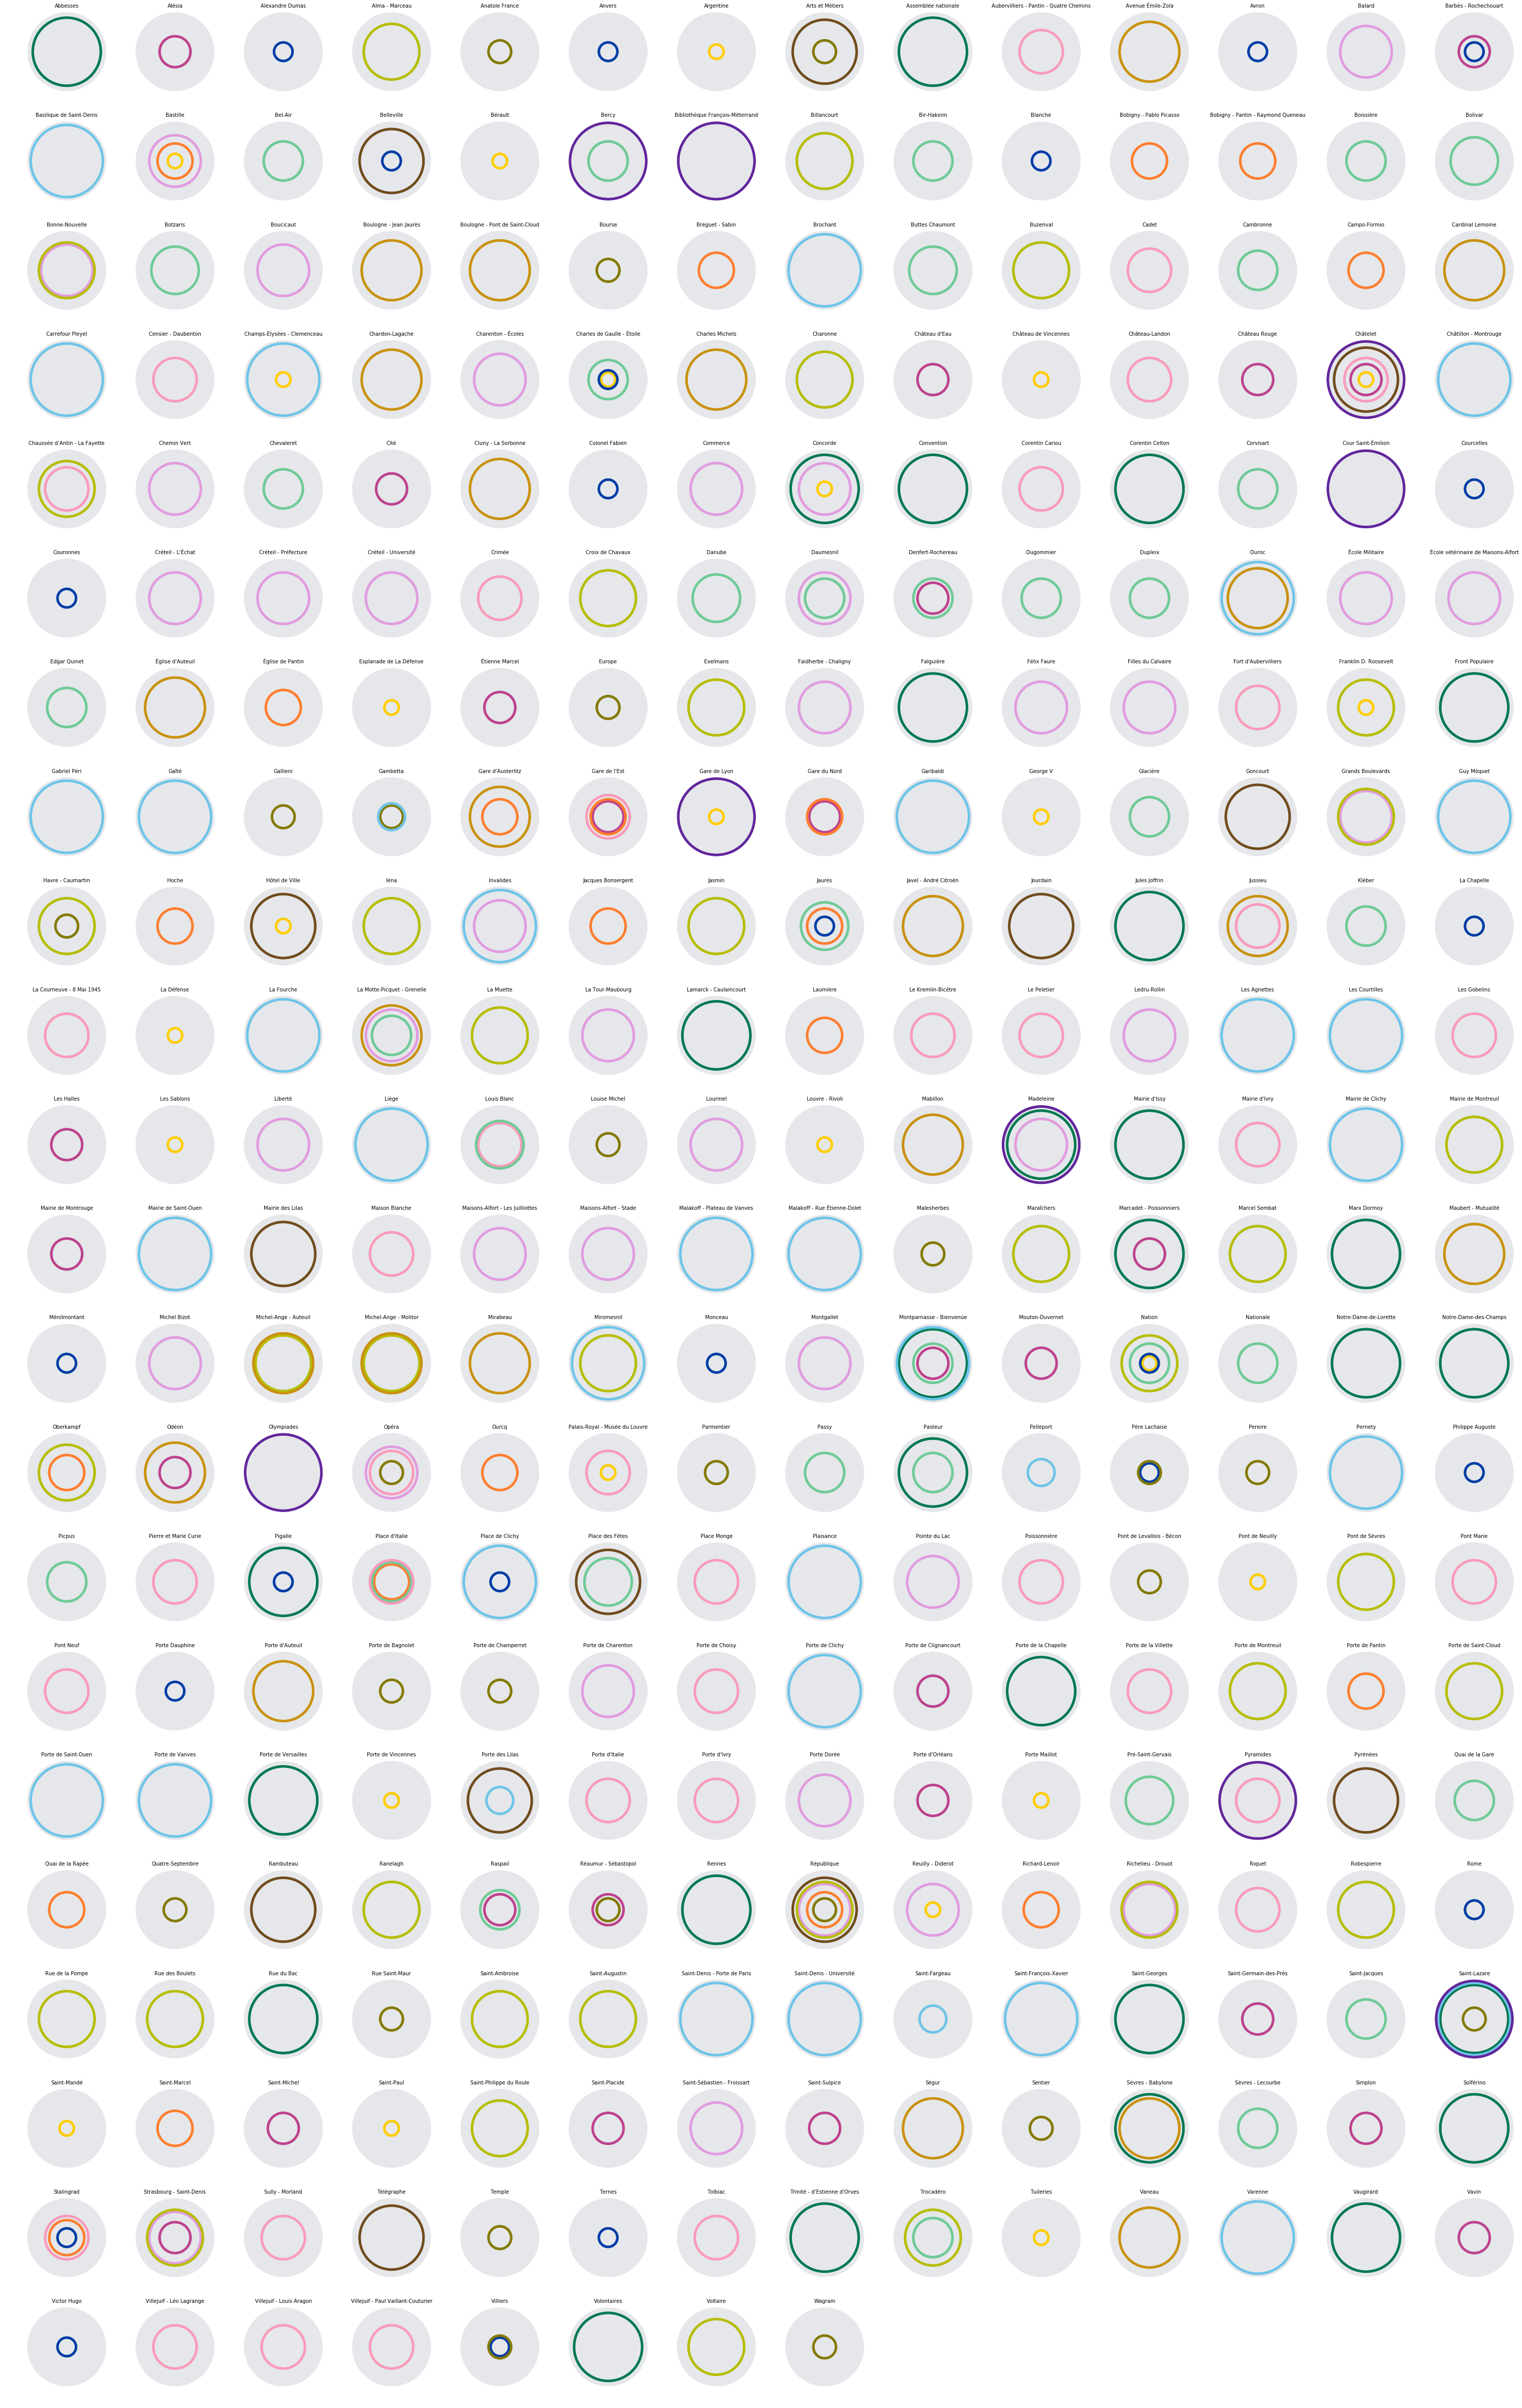

In [204]:
import seaborn as sns

max_index = stations['line_index'].max()
lims = [-max_index - 1, max_index + 1]


def plot_default(**kwargs):
    ax = plt.gca()
    ax.add_patch(Circle((0, 0), radius=max_index, color='#e5e7ea'))
    ax.set_aspect(1)
    ax.axis('off')

def plot_station(line_index, line_color, **kwargs):
    ax = plt.gca()
    for i, c in zip(line_index, line_color):
        ax.add_patch(Wedge(
            (0, 0),
            i,
            0, 360,
            width=1,
            color=c
        ))
    
grid = (
    sns.FacetGrid(
        stations, size=3, xlim=lims, ylim=lims,
        col='station', col_wrap=14
    )
    .map(plot_default)
    .map(plot_station, 'line_index', 'line_color')
    .set_titles("{col_name}")
)

In [205]:
grid.savefig(io.create_abspath('station.pdf'), bbox_inches='tight', pad_inches=3)